#### Artificial Neutal Network (ANN)

Las redes neuronales artificiales (ANN) intentan replicar el comportamiento de las redes neuronales cerebrales. Su popularidad reciente se debe a la capacidad de procesar redes neuronales muy complejas.

Algunas de sus características:

* Caputran relaciones no lineales
* Formadas por unidades de cálculo sencillas (neuronas/perceptón) interconectadas
* Cálulos paralelos
* Toleran fallos (evita sobreajuste)
* Robustas 
* Aprenden a partir de ejemplos y son capaces de generalizar
* Comportamiento individyal (neuronal) diferente al colectivo (red neuronal)

El modelo más sencillo consiste en un perceptrón

* Una única capa de neuronas
* Cada neurona recibe una variable de entrada
* Cada neurona tiene un peso
* Se agregan mediante una función de activavión (umbral, sigmoide, tangente hiperbólica)
* El modelo estima pesos que permitan separar una clase de la otra

Si se añaden diversas capas intermedias (ocultas), se obtiene un perceptrón multicapa

Restricciones:

* Dificultad en la interpretación
* Dificultad en el diseño de la red a priori, necesidad de iptimización de hiperparámetros
* Alto coste computacional si la estructura es compleja
* Sobreajuste si hay demasiadas coapas
* Sensibilidad a escalas/magnitudes, conviene estandarizar las variables

Parámetros (Perceprtón multicapa, MLPClassifier):

* hidden_layer_sizes: vector con el número de neuronas por capa oculta que se quiere inclui
* activation: función de activavión: "logistic", "tanh","relu"

In [67]:
# Importa Paquetes 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [68]:
# Carga de datos 

titanic = pd.read_csv("C:/Users/pauri/OneDrive/Escritorio/Python projects/CUA Big Data/titanic (1).csv")
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
titanic.set_index("PassengerId",inplace=True)

Estudiamos si existen valores missing

In [71]:
titanic.isnull().sum()/titanic.shape[0]

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

El 20% de la vaiable Age y el 77% de la variable Cabin vienen missing. La variable Cabin la eliminaemos, pues hay muchos missing values. Para la variable Embaked los sustituimos por el valor mas repetido.

<Axes: title={'center': 'Age'}, xlabel='[Pclass]'>

<Figure size 2000x1000 with 0 Axes>

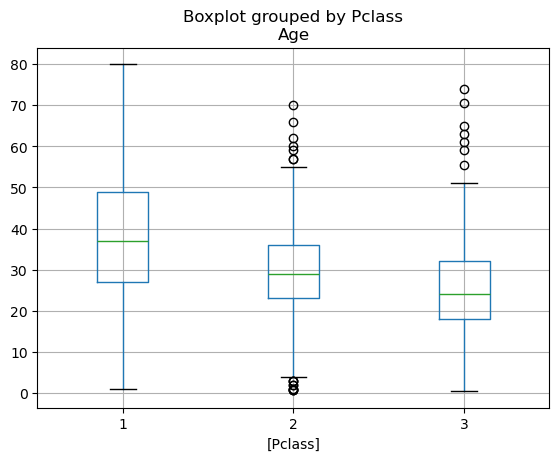

In [73]:
# Para la variable Age, sustituiremos los valores missing cruzandola con otra vairable categórica, como PClass

plt.figure(figsize=(20,10))
titanic[["Age","Pclass"]].boxplot(by="Pclass")

In [74]:
# Sustutiumos la variable missing por age 38, 29 o 24 en función de si Pclass es 1, 2 o 3.

def imputar_edad (cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        if Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [75]:
titanic["Age"] = titanic[["Age","Pclass"]].apply(imputar_edad,axis=1)

C:\Users\pauri\AppData\Local\Temp\ipykernel_14296\715590607.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\pauri\AppData\Local\Temp\ipykernel_14296\715590607.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [76]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [77]:
# Eliminamos vaiable cabin y los missing values de Embarked

titanic.drop("Cabin",axis=1,inplace=True)
titanic.dropna(inplace=True)
titanic.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [93]:
# Transformación variables categóricas

sex = pd.get_dummies(titanic["Sex"],drop_first=True).astype(int)
embarked = pd.get_dummies(titanic["Embarked"],drop_first=True).astype(int)

In [101]:
# Eliminamos la variable Ticket por ser identificador del pasaejro y la variable nombre

titanic.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)
titanic = pd.concat([titanic,sex,embarked],axis=1)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1


#### Preparación entrada modelos

In [104]:
X = titanic.drop("Survived",axis=1)
y = titanic["Survived"]

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123456789)

#### Estimación de la red neuronal (MLP)

In [109]:
mlp = MLPClassifier (hidden_layer_sizes=(5,2), activation = "tanh", random_state=1)

mlp.fit(X_train,y_train)

C:\Users\pauri\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 2), random_state=1)

#### Clasificación con el MLP

Podemos obtener las predicciones como probabilidades (gracias al parámetro probability = True) o clases estimadas.

In [114]:
test_predicción_1= mlp.predict(X_test)
test_predicción_1

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [118]:
test_predict_prob_1= mlp.predict_proba(X_test)
test_predict_prob_1

array([[0.25745034, 0.74254966],
       [0.75293005, 0.24706995],
       [0.40917704, 0.59082296],
       [0.75723533, 0.24276467],
       [0.58787934, 0.41212066],
       [0.76288428, 0.23711572],
       [0.4546964 , 0.5453036 ],
       [0.63446578, 0.36553422],
       [0.76538881, 0.23461119],
       [0.6990624 , 0.3009376 ],
       [0.77142345, 0.22857655],
       [0.28657102, 0.71342898],
       [0.54855482, 0.45144518],
       [0.71406268, 0.28593732],
       [0.76257264, 0.23742736],
       [0.74181078, 0.25818922],
       [0.44427557, 0.55572443],
       [0.55057667, 0.44942333],
       [0.30367628, 0.69632372],
       [0.39516947, 0.60483053],
       [0.75857368, 0.24142632],
       [0.56174483, 0.43825517],
       [0.27712395, 0.72287605],
       [0.26666588, 0.73333412],
       [0.21569162, 0.78430838],
       [0.76116041, 0.23883959],
       [0.22157614, 0.77842386],
       [0.76345019, 0.23654981],
       [0.75062033, 0.24937967],
       [0.26643568, 0.73356432],
       [0.

#### Evaluación del MLP

Calculamos la matriz de confusión, algunas métricas de evaluación habituales, y el coeficiente <b>AUC</b> o <b>ROC</b> y el <b>gini</b> los modelos.

<Axes: >

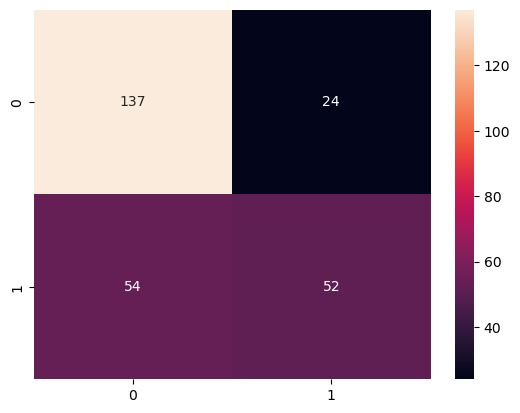

In [123]:
cm = confusion_matrix(y_test, test_predicción_1)
sns.heatmap(cm, annot=True, fmt="d")

In [127]:
print(classification_report(y_test,test_predicción_1))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       161
           1       0.68      0.49      0.57       106

    accuracy                           0.71       267
   macro avg       0.70      0.67      0.67       267
weighted avg       0.70      0.71      0.70       267



Para obtener la curva y métrica ROC, volvemos a utilziar las probabilidades esitmadas (en lugar de las clases).

In [130]:
fpr_1,tpr_1,umbrales_1=roc_curve(y_test, test_predic_prob_1[:,1], pos_label = 1)

NameError: name 'test_predic_prob_1' is not defined